# Nous' Data Analytics Virtual Experience Task 1

How has the student to teacher ratio in Queensland’s government-run high schools compared over time with other schools in the state and those in NSW and Victoria?

In [1]:
#import libraries and data
import pandas as pd
import numpy as np
import plotly as px


Dataset was extracted from ABS

In [2]:
df = pd.read_excel('Table 53a Student (FTE) to Teaching Staff (FTE) Ratios, 2006-2023.xlsx', sheet_name=1)
df.head()

,Australian Bureau of Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"Schools, 2023",NaN,NaN,NaN,NaN
1,"Released at 11.30am (Canberra time) Wednesday,...",NaN,NaN,NaN,NaN
2,Table 53a: Student (FTE) to Teaching Staff (FT...,NaN,NaN,NaN,NaN
3,Year,State/Territory,Affiliation,School Level,Student to Teaching Staff Ratio
4,2023,a NSW,a Government,a Primary School,14.9


In [10]:
# the first 4 rows are just info about dataset, will remove and row 5 is meant to be heading
df = df.drop(df.index[0:4]).reset_index().drop('index',axis=1)

In [11]:
df.columns = ['Year',	'State/Territory',	'Affiliation',	'School Level',	'Ratio']

In [13]:
#I named ratio as column as it is shorter and represents student to teaching ratio
df.head()

,Year,State/Territory,Affiliation,School Level,Ratio
0,2023,a NSW,a Government,a Primary School,14.9
1,2023,a NSW,a Government,b Secondary School,13.2
2,2023,a NSW,a Government,c All Levels,14.1
3,2023,a NSW,b Non-Government,a Primary School,15.1
4,2023,a NSW,b Non-Government,b Secondary School,11.1


In [16]:
df['State/Territory'].value_counts()

State/Territory
a NSW      270
b Vic.     270
c Qld      270
d SA       270
e WA       270
f Tas.     270
g NT       270
h ACT      270
i Aust.    270
Name: count, dtype: int64

In [17]:
df['Affiliation'].value_counts()

Affiliation
a Government          486
b Non-Government      486
c Catholic            486
d Independent         486
e All Affiliations    486
Name: count, dtype: int64

I have two main questions to anser:
1. How do govt run schools in Qld compare to non-govt schools in Qld.
2. How do govt run schools in Qld compare to schools in NSW and Vic.

## Question 1

In [20]:
# I will create one dataset with just Qld schools
qld = df[df['State/Territory']== 'c Qld']
qld.head()

,Year,State/Territory,Affiliation,School Level,Ratio
30,2023,c Qld,a Government,a Primary School,14.2
31,2023,c Qld,a Government,b Secondary School,12
32,2023,c Qld,a Government,c All Levels,13.2
33,2023,c Qld,b Non-Government,a Primary School,15.8
34,2023,c Qld,b Non-Government,b Secondary School,12


In [23]:
# will change to other two categories, a government and non government
qld.Affiliation = np.where( qld.Affiliation == 'a Government', 'a Government','Non Government')

C:\Users\natha\AppData\Local\Temp\ipykernel_25528\3436494353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qld.Affiliation = np.where( qld.Affiliation == 'a Government', 'a Government','Non Government')


In [24]:
qld.head()

,Year,State/Territory,Affiliation,School Level,Ratio
30,2023,c Qld,a Government,a Primary School,14.2
31,2023,c Qld,a Government,b Secondary School,12
32,2023,c Qld,a Government,c All Levels,13.2
33,2023,c Qld,Non Government,a Primary School,15.8
34,2023,c Qld,Non Government,b Secondary School,12


In [25]:
qld.Affiliation.value_counts()

Affiliation
Non Government    216
a Government       54
Name: count, dtype: int64

In [30]:
#Now I will group by year average
qld_year = qld.groupby(['Year','Affiliation'])['Ratio'].mean().reset_index()
qld_year.head()

,Year,Affiliation,Ratio
0,2006,Non Government,14.133333
1,2006,a Government,14.3
2,2007,Non Government,14.633333
3,2007,a Government,14.3
4,2008,Non Government,14.608333


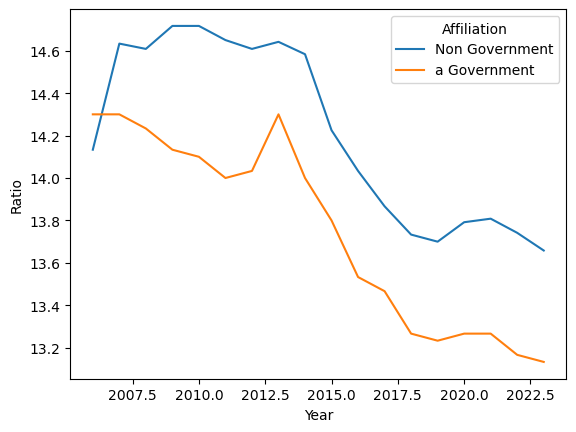

In [44]:
#Graph results over time
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = qld_year, x='Year',y='Ratio', hue='Affiliation')
plt.show()

The graph clearly shows that:
1. the ratio has been declining over the last 17 years for both.
2. Non-government ratio is higher.

I can investigate further to statistically prove there is a difference.

In [73]:
#Grab each dataset ratios
g = qld_year[qld_year.Affiliation == 'a Government']['Ratio']
n = qld_year[qld_year.Affiliation != 'a Government']['Ratio']


<Axes: xlabel='Ratio', ylabel='Count'>

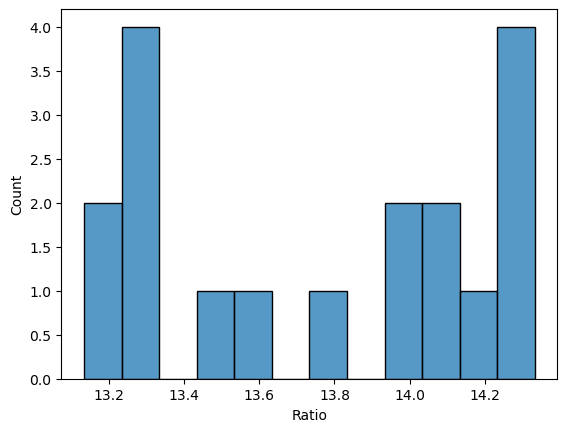

In [75]:
sns.histplot(g, binwidth=0.1)

<Axes: xlabel='Ratio', ylabel='Count'>

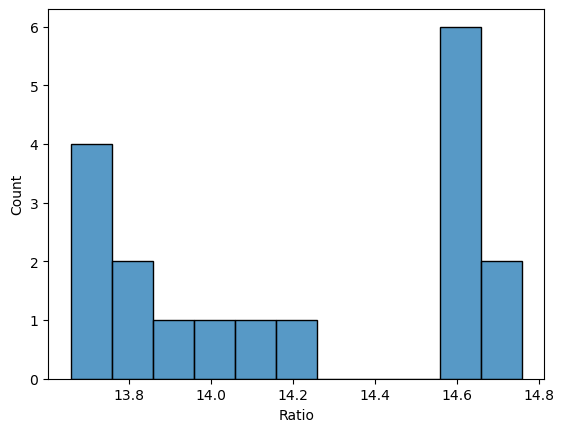

In [76]:
sns.histplot(n, binwidth=0.1)

Histograms show data sets do not exist a normal distribution, hence a non parametric t test will be used.

In [77]:
gov= np.array(g).astype(float)
non= np.array(n).astype(float)

In [80]:
from scipy.stats import mannwhitneyu

stat, p =mannwhitneyu(gov,non)
print(stat)
print(p)

82.5
0.01238224292135835


The mann whitney u non-parametric test produced a p-value of 0.012, hence I can reject the null hypothesis, and conclude non government schools have a higher student to teacher ratio on average.

## 2. Qld vs NSW and Vic

In [81]:
df.head()

,Year,State/Territory,Affiliation,School Level,Ratio
0,2023,a NSW,a Government,a Primary School,14.9
1,2023,a NSW,a Government,b Secondary School,13.2
2,2023,a NSW,a Government,c All Levels,14.1
3,2023,a NSW,b Non-Government,a Primary School,15.1
4,2023,a NSW,b Non-Government,b Secondary School,11.1


In [90]:
nsw = df['State/Territory'] == 'a NSW'
vic = df['State/Territory'] == 'b Vic.'
qld = df['State/Territory'] == 'c Qld'
gov = df['Affiliation']== 'a Government'

In [102]:
#filter out NSW, Vic and govt Qld schools

state = df[nsw|vic|(qld&gov)].reset_index().drop('index',axis=1)
state

,Year,State/Territory,Affiliation,School Level,Ratio
0,2023,a NSW,a Government,a Primary School,14.9
1,2023,a NSW,a Government,b Secondary School,13.2
2,2023,a NSW,a Government,c All Levels,14.1
3,2023,a NSW,b Non-Government,a Primary School,15.1
4,2023,a NSW,b Non-Government,b Secondary School,11.1
...,...,...,...,...,...
589,2006,b Vic.,e All Affiliations,b Secondary School,11.7
590,2006,b Vic.,e All Affiliations,c All Levels,13.7
591,2006,c Qld,a Government,a Primary School,15.5
592,2006,c Qld,a Government,b Secondary School,13


In [103]:
#filter by average of each state
year_avg = state.groupby(['Year','State/Territory'])['Ratio'].mean().reset_index()


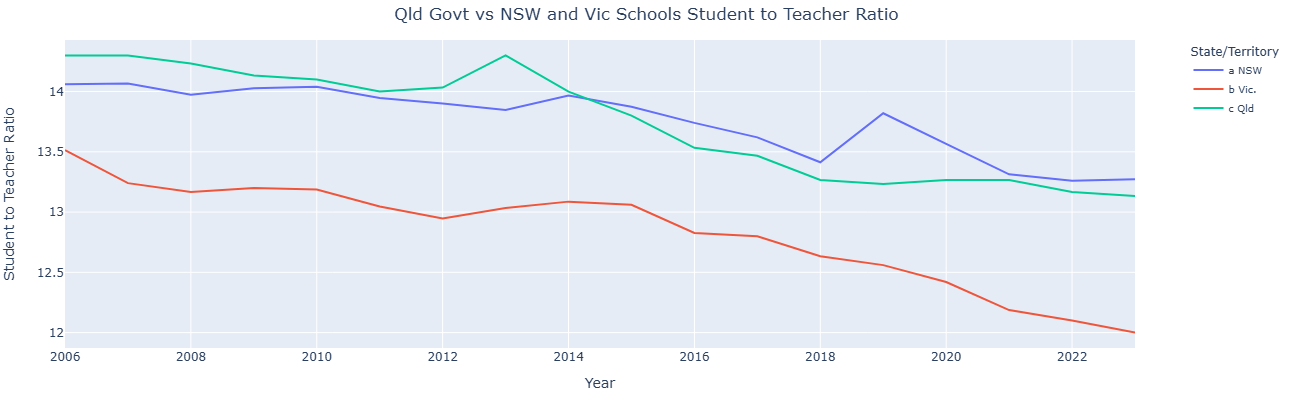

In [127]:
import plotly.express as px
fig = px.line(
    year_avg, 
    x='Year', 
    y='Ratio', 
    color='State/Territory', 
    title='Qld Govt vs NSW and Vic Schools Student to Teacher Ratio'
)

# Adjusting the layout for a more condensed graph
fig.update_layout(
    title={'text': 'Qld Govt vs NSW and Vic Schools Student to Teacher Ratio', 'x': 0.5},
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(size=10),
        bgcolor='rgba(255, 255, 255, 0.5)'
    ),
    margin=dict(l=40, r=40, t=40, b=40),
    width=800,
    height=400,
    xaxis_title='Year',
    yaxis_title='Student to Teacher Ratio'
)

# Show the figure
fig.show()


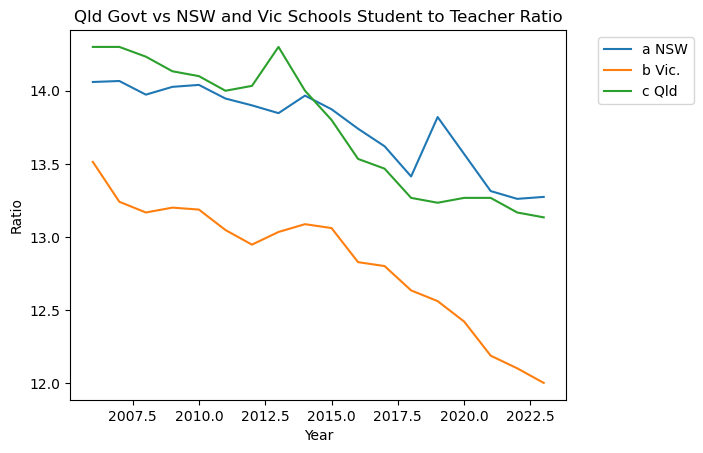

In [104]:
#Represent averages over time
sns.lineplot(data=year_avg, x='Year',y='Ratio', hue='State/Territory')
plt.title('Qld Govt vs NSW and Vic Schools Student to Teacher Ratio')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Again a clear down trend for all schools in terms of student to teadcher ratio. Victoria far below both. Qld was higher than NSW until 2014 then NSW has been higher since. I will conduct a further test to see if they are truly statistically different (NSW and QLD).

In [111]:
# filter out qld and nsw to do non parameteric test
q = np.array(year_avg[year_avg['State/Territory'] =='c Qld']['Ratio']).astype(float)
n = np.array(year_avg[year_avg['State/Territory'] =='a NSW']['Ratio']).astype(float)

<Axes: ylabel='Count'>

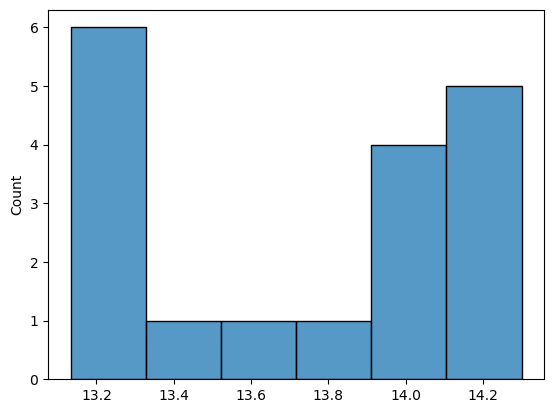

In [112]:
sns.histplot(q)

<Axes: ylabel='Count'>

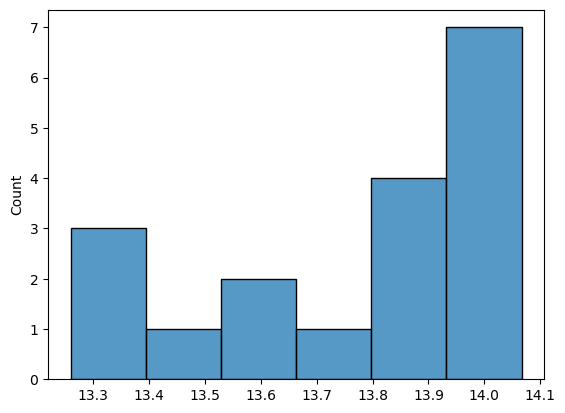

In [113]:
sns.histplot(n)

In [115]:
#non parametric test for qld vs nsw
stat, p = mannwhitneyu(q,n)
print(stat)
print(p)

169.0
0.8369704938375371


P-value of 0.8369 shows I can't reject null hypothesis. I conclude on average the student to teacher ratio for qld govt and nsw schools has been the same over last 17 years.

In [117]:
#non parametric test for qld vs victoria
v = np.array(year_avg[year_avg['State/Territory'] =='b Vic.']['Ratio']).astype(float)
stat, p = mannwhitneyu(q,v)
print(stat)
print(p)

308.5
3.796716641782435e-06


I conducted the test to clarify that qld govt schools statistically have higher student teacher ratios.

# Conclusions

- Qld non government schools have higher student to teacher ratios than Qld govt schools.
- Qld govt schools have higher averages than Vic schools
- Qld and nsw have same average ratios over last 17 years